In [1]:
# IMPORTS

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
import function_utils
print(tf.config.list_physical_devices('XPU'))

2025-11-10 01:47:38.070998: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-10 01:47:38.072560: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 01:47:38.093762: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-10 01:47:38.093787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-10 01:47:38.094597: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

[PhysicalDevice(name='/physical_device:XPU:0', device_type='XPU')]


2025-11-10 01:47:39.274559: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /tensorflow/core/bfc_allocator_delay. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the name is already used by other metrics.
2025-11-10 01:47:39.274679: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /xla/service/gpu/compiled_programs_count. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the name is already used by other metrics.
2025-11-10 01:47:39.275348: W external/local_tsl/tsl/lib/monitoring/collection_registry.cc:81] Trying to register 2 metrics with the same name: /jax/pjrt/pjrt_executable_executions. The old value will be erased in order to register a new one. Please check if you link the metric more than once, or if the nam

In [2]:
# LOAD DATASET

# X = np.loadtxt('X_comp_1_3.npy', delimiter=',')
X = function_utils.load_sympy_to_np_array('SE_comp_1_3.pkl')
y = np.loadtxt('y_comp_1_3.npy', delimiter=',')

# Preprocess the input
for i in range(X.shape[0]):
    if np.std(X[i]) == 0:
        X[i] = 0
        continue
    X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
# X = np.tanh(X)

n_samples = X.shape[0]
perm = np.random.permutation(n_samples)  # random permutation of indices

X_shuffled = X[perm]
y_shuffled = y[perm]

train_frac = 0.8
n_train = int(train_frac * n_samples)

X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]
X_val = X_shuffled[n_train:]
y_val = y_shuffled[n_train:]

/home/lethan3/miniconda3/envs/tensorflowintel/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/lethan3/miniconda3/envs/tensorflowintel/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [3]:
# MODEL

model = tf.keras.Sequential([
    tfl.Dense(800, name="layer1", input_shape=(function_utils.SAMPLES,)),
    tfl.LeakyReLU(0.3),
    tfl.Dropout(0.75),
    tfl.Dense(200, name="layer2"),
    tfl.LeakyReLU(0.3),
    tfl.Dropout(0.75),
    # tfl.Dense(40, name="layer3"),
    # tfl.LeakyReLU(0.3),
    # tfl.Dropout(0.75),
    tfl.Dense(1, name="layer4"),
])

model(X)

2025-11-10 01:49:43.982199: I tensorflow/core/common_runtime/next_pluggable_device/next_pluggable_device_factory.cc:118] Created 1 TensorFlow NextPluggableDevices. Physical device type: XPU


onednn_verbose,v1,info,oneDNN v3.8.0 (commit 5dc2e69f319ab59520c9096436488c11ab86fd93)
onednn_verbose,v1,info,cpu,runtime:DPC++,nthr:1
onednn_verbose,v1,info,cpu,isa:Intel AVX2 with Intel DL Boost, float16 and bfloat16 support
onednn_verbose,v1,info,gpu,runtime:DPC++
onednn_verbose,v1,info,cpu,engine,sycl cpu device count:1 
onednn_verbose,v1,info,cpu,engine,0,backend:OpenCL,name:Intel(R) Core(TM) Ultra 7 258V,driver_version:2025.20.10
onednn_verbose,v1,info,gpu,engine,sycl gpu device count:1 
onednn_verbose,v1,info,gpu,engine,0,backend:Level Zero,name:Intel(R) Arc(TM) Graphics,driver_version:1.6.34666,binary_kernels:enabled
onednn_verbose,v1,info,graph,backend,0:dnnl_backend
onednn_verbose,v1,info,experimental features are enabled
onednn_verbose,v1,info,use batch_normalization stats one pass is enabled
onednn_verbose,v1,info,GPU convolution v2 is disabled
onednn_verbose,v1,info,experimental functionality for sparse domain is enabled
onednn_verbose,v1,primitive,info,template:operation,

<tf.Tensor: shape=(50000, 1), dtype=float32, numpy=
array([[-0.61621916],
       [-0.61621916],
       [-0.7412419 ],
       ...,
       [-0.6500922 ],
       [ 0.14052749],
       [-0.6951085 ]], dtype=float32)>

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 800)               400800    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 layer2 (Dense)              (None, 200)               160200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 layer4 (Dense)              (None, 1)                 2

In [5]:
def rounded_accuracy(y_true, y_pred):
    y_pred_rounded = tf.round(y_pred)
    return tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred_rounded), tf.float32))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='mae',
              metrics=[rounded_accuracy])

Epoch 1/250
1/1 [==============================] - 0s 306ms/step - loss: 0.6965 - rounded_accuracy: 0.5134 - val_loss: 0.6811 - val_rounded_accuracy: 0.5199
Epoch 2/250
1/1 [==============================] - 0s 233ms/step - loss: 0.6961 - rounded_accuracy: 0.5116 - val_loss: 0.6995 - val_rounded_accuracy: 0.5199
Epoch 3/250
1/1 [==============================] - 0s 211ms/step - loss: 0.7136 - rounded_accuracy: 0.5140 - val_loss: 0.6938 - val_rounded_accuracy: 0.5211
Epoch 4/250
1/1 [==============================] - 0s 230ms/step - loss: 0.7157 - rounded_accuracy: 0.5113 - val_loss: 0.7023 - val_rounded_accuracy: 0.5214
Epoch 5/250
1/1 [==============================] - 0s 238ms/step - loss: 0.7201 - rounded_accuracy: 0.5117 - val_loss: 0.7035 - val_rounded_accuracy: 0.5213
Epoch 6/250
1/1 [==============================] - 0s 217ms/step - loss: 0.7201 - rounded_accuracy: 0.5147 - val_loss: 0.6994 - val_rounded_accuracy: 0.5210
Epoch 7/250
1/1 [==============================] - 0s 210m

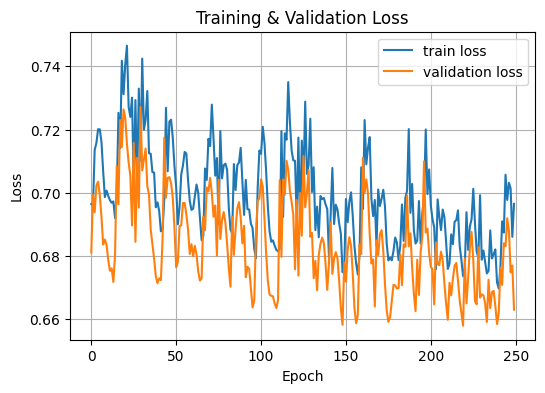

In [10]:
# Assuming x_train and y_train are your training data
history = model.fit(X_train, y_train, epochs=250, batch_size=40000, validation_data=(X_val, y_val))

# Plot training & validation loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
model.save("dense_800_200_acc_51")

INFO:tensorflow:Assets written to: dense_800_200_acc_51/assets


INFO:tensorflow:Assets written to: dense_800_200_acc_51/assets


In [1]:
ind = 32
# print(np.min(X_val[ind]))
plt.plot(function_utils.XS, X_val[ind])
print(y_val[ind])

NameError: name 'plt' is not defined

In [14]:
# Round predictions
y_pred = tf.round(model(X_train))

# Convert to numpy arrays
y_pred = y_pred.numpy().astype(int).flatten()
y_true = y_train.astype(int).flatten()

# Compute totals per class (0..3 assumed)
n_classes = 4
tot = np.bincount(y_true, minlength=n_classes)
correct = np.bincount(y_true[y_pred == y_true], minlength=n_classes)

# Class-wise accuracy
acc = correct / tot

acc

array([1.        , 0.43667033, 0.64591245, 0.05739758])

In [15]:
np.sum(y_train == 0) / y_train.shape[0]
# model(X_train[:100])

0.2498